# LSTMの学習

https://www.youtube.com/watch?v=CbTU92pbDKw

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df_raw = pd.read_csv('MSFT.csv')

In [4]:
df_raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...,...
9133,2022-06-07,266.640015,273.130005,265.940002,272.500000,272.500000,22860700
9134,2022-06-08,271.709991,273.000000,269.609985,270.410004,270.410004,17372300
9135,2022-06-09,267.779999,272.709991,264.630005,264.790009,264.790009,26439700
9136,2022-06-10,260.579987,260.579987,252.529999,252.990005,252.990005,31422800


In [5]:
df = df_raw[['Date', 'Close']]

In [6]:
import datetime

In [7]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [8]:
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [9]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9133,2022-06-07,272.500000
9134,2022-06-08,270.410004
9135,2022-06-09,264.790009
9136,2022-06-10,252.990005


In [10]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\09de1\AppData\Local\Temp\ipykernel_16404\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9133   2022-06-07
9134   2022-06-08
9135   2022-06-09
9136   2022-06-10
9137   2022-06-13
Name: Date, Length: 9138, dtype: datetime64[ns]

In [11]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-06-07,272.500000
2022-06-08,270.410004
2022-06-09,264.790009


In [12]:
import matplotlib.pyplot as plt

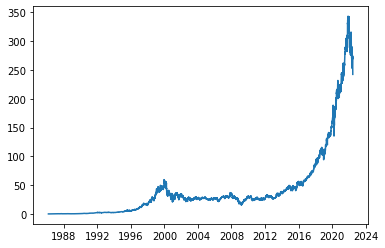

In [13]:
plt.plot(df.index, df['Close'])

In [14]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    
    dates = []
    X, Y = [], []
    
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date = next_date
        
        if target_date == last_date:
            last_time = True
            
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:,i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                               '2021-03-25',
                               '2022-03-23',
                               n=3)

In [15]:
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [16]:
df_raw[df_raw['Date']=='2021-03-25']

,Date,Open,High,Low,Close,Adj Close,Volume
8830,2021-03-25,235.300003,236.940002,231.570007,232.339996,229.927261,34061900


In [17]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1: -1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

In [18]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

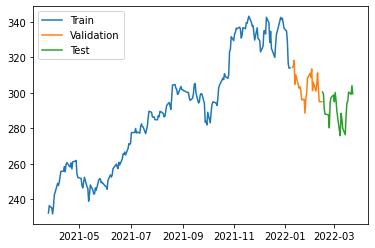

In [19]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train','Validation','Test'])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                   layers.LSTM(64),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
             optimizer=Adam(learning_rate=0.001),
             metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 109ms/step - loss: 84294.2422 - mean_absolute_error: 288.5905 - val_loss: 91905.5469 - val_mean_absolute_error: 303.0719
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 83936.0859 - mean_absolute_error: 287.9689 - val_loss: 91493.7578 - val_mean_absolute_error: 302.3918
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 83562.5859 - mean_absolute_error: 287.3198 - val_loss: 91115.6562 - val_mean_absolute_error: 301.7660
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 83178.2891 - mean_absolute_error: 286.6478 - val_loss: 90653.6328 - val_mean_absolute_error: 300.9994
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 82680.8594 - mean_absolute_error: 285.7829 - val_loss: 90039.3984 - val_mean_absolute_error: 299.9774
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 82051.7578 - mean_absolute_error: 284.6765 - val_loss: 89290.

7/7 [==============================] - 0s 3ms/step


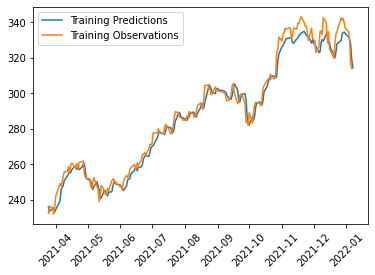

In [21]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xticks(rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

In [22]:
pd.DataFrame({'Date':dates[:q_80], 'Target(Close)':y_train,'Prediction':train_predictions})

,Date,Target(Close),Prediction
0,2021-03-25,232.339996,235.952271
1,2021-03-26,236.479996,233.585144
2,2021-03-29,235.240005,235.158615
3,2021-03-30,231.850006,235.457413
4,2021-03-31,235.770004,233.222656
...,...,...,...
196,2022-01-03,334.750000,331.696014
197,2022-01-04,329.010010,330.409454
198,2022-01-05,316.380005,327.248810
199,2022-01-06,313.880005,319.120514


1/1 [==============================] - 0s 16ms/step


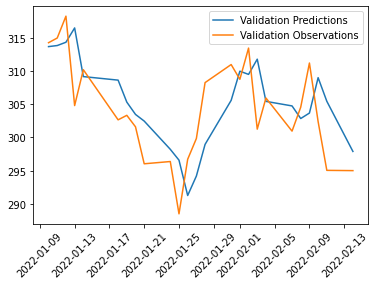

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation=45)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 16ms/step


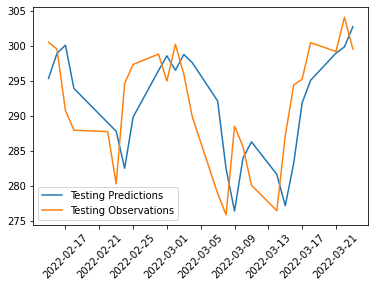

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation=45)
plt.legend(['Testing Predictions','Testing Observations'])

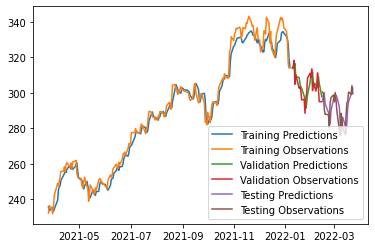

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])

In [26]:
from copy import deepcopy

In [27]:
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 16ms/step


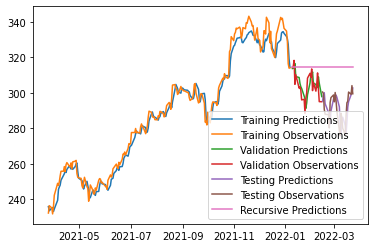

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations',
           'Recursive Predictions'])